### Carregar os dados


In [1]:
#import os
#os.getcwd()

focoDias = 100
focoPeso = 85

import pandas as pd
import numpy as np

def LerJSON(data):
    import json
    if (data == ''):
        return json.loads('[]')
    else:
        return json.loads(data)

df_dados = pd.read_csv('./dados.csv', quotechar='\'', \
                       converters={'AtividadeFisica':LerJSON, 'AlimentacaoTipo':LerJSON}, header=0)

Cálculo do limite de peso

In [2]:
count = df_dados['Peso'].count()
max = df_dados['Peso'].max()

linha_limite = pd.Series(range(0, focoDias))
linha_limite = max - (linha_limite * ((max - focoPeso) / focoDias))
df_dados['Limite'] = linha_limite

Nível de atividades físicas

In [3]:
def scoreAtividade(data):
    score = 0
    for atividade in data:
        if (atividade['Tipo'] == 'Corrida'):
            score = score + atividade['Distancia'] * atividade['Velocidade']
        elif (atividade['Tipo'] == 'Musculação'):
            score = 15
    return score

df_dados['ScoreAtividade'] = df_dados['AtividadeFisica'].apply(scoreAtividade)
df_dados['ScoreAtividade'] = 25 * df_dados['ScoreAtividade']

def tipoAtividade(data):
    tipo = 0
    for atividade in data:
        if (atividade['Tipo'] == 'Corrida'):
            tipo = tipo + 1
        elif (atividade['Tipo'] == 'Musculação'):
            tipo = tipo + 2
    return tipo

df_dados['Tipo'] = df_dados['AtividadeFisica'].apply(tipoAtividade)

Nível de alimentação

In [4]:
def tipoAlimentacao(data):
    tipo = 0        
    for alimentacao in data:
        tipo = tipo + {
            'Raízes': lambda: 1,
            'Legumes': lambda: 2,
            'Frutas': lambda: 4,
            'Laticínios': lambda: 8,
            'Farinários': lambda: 16,
            'Proteína Animal': lambda: 32,
            'Açúcar': lambda: 64
        }.get(alimentacao, lambda: 0)()
    return tipo

def nivelAlimentacao(data):
    return {
        'Baixa': lambda: 1,
        'Moderada': lambda: 2,
        'Alta': lambda: 4,
    }.get(data, lambda: 0)()

alimentacaoTipo = df_dados['AlimentacaoTipo'].apply(tipoAlimentacao)
alimentacaoVolume = df_dados['AlimentacaoNivel'].apply(nivelAlimentacao)
df_dados["ScoreAlimentacao"] = 0.025 * np.sqrt(alimentacaoTipo * alimentacaoVolume)

Número de dias

In [5]:
df_dados["NumeroDias"] = df_dados.index + 1

Geração do gráfico

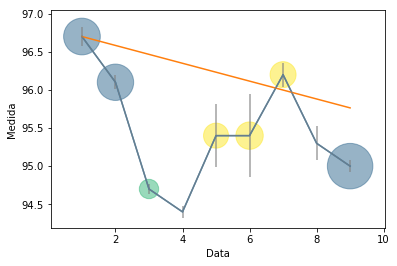

In [8]:
import matplotlib.pyplot as plt

plt.plot(df_dados["NumeroDias"], df_dados["Peso"])
plt.plot(df_dados["NumeroDias"], df_dados["Limite"])
plt.scatter(df_dados["NumeroDias"], df_dados["Peso"], s=df_dados["ScoreAtividade"], c=df_dados["Tipo"], alpha=0.5)
plt.errorbar(df_dados["NumeroDias"], df_dados["Peso"], yerr=df_dados['ScoreAlimentacao'], c="grey", alpha=0.75)
plt.xlabel("Data")
plt.ylabel("Medida")
plt.show()

Visualização da Tabela

In [7]:
df_dados[['Data', 'NumeroDias', 'Peso', 'Limite', 'ScoreAtividade', 'ScoreAlimentacao']]

,Data,NumeroDias,Peso,Limite,ScoreAtividade,ScoreAlimentacao
0,2018-09-23,1,96.7,96.700,1346.64,0.122474
1,2018-09-24,2,96.1,96.583,1323.00,0.093541
2,2018-09-25,3,94.7,96.466,375.00,0.066144
3,2018-09-26,4,94.4,96.349,0.00,0.079057
4,2018-09-27,5,95.4,96.232,625.00,0.415331
5,2018-09-28,6,95.4,96.115,750.00,0.540833
6,2018-09-29,7,96.2,95.998,675.00,0.158114
7,2018-09-30,8,95.3,95.881,0.00,0.223607
8,2018-10-01,9,95.0,95.764,2070.81,0.079057
